## - 불러올 패키지 목록

In [1]:
# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# 사이킷런 패키지
from sklearn.preprocessing import *  # 데이터 전처리를 위한 패키지
from sklearn.model_selection import *  # 데이터 분리, 검증 및 파라미터 튜닝을 위한 패키지
from sklearn.metrics import *  # 모델에 대한 다양한 성능 평가를 위한 패키지
from sklearn.cluster import *  # 비지도 군집화 알고리즘 제공
from sklearn.tree import *  # 의사결정나무 알고리즘 제공
from sklearn.ensemble import *  # 앙상블 알고리즘 제공
from sklearn.neighbors import *  # kNN 알고리즘 제공
from sklearn.svm import *  # 서포트 벡터 머신 알고리즘 제공

# 사이파이 패키지
from scipy.cluster.hierarchy import *  # 계층적 군집 분석을 위한 패키지

# label별 데이터 카운트를 위한 모듈
from collections import Counter  # https://docs.python.org/3/library/collections.html

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 시각화를 위한 패키지
import seaborn as sb
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from mlxtend.plotting import plot_decision_regions

%matplotlib inline
# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.

# 그래프 스타일 서식 지정
plt.style.use('default')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 그래프 축의 음수 표현 오류 방지
plt.rcParams['axes.unicode_minus'] = False

# Dataset 불러오기 및 data 정보 확인

## Dataset 불러오기

In [2]:
df_credit = pd.read_csv(r'C:\Users\Boanerges\GitHub\TIL\ADP_study\rawdata\credit_final.csv')

df_credit

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,2,2,3,...,4,1,21,2,1,1,2,2,1,1
996,0,1,24,2,4,2303,1,4,4,3,...,1,1,45,2,2,1,3,1,1,1
997,0,3,21,3,4,12680,4,4,4,3,...,4,4,30,2,3,1,4,1,2,1
998,0,2,12,2,3,6468,4,1,2,3,...,1,4,52,2,2,1,4,1,2,1


## Dataset의 대략적인 분포 확인

In [3]:
df_credit.describe()

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.183000,20.903000,2.292000,2.965000,3271.24800,1.874000,2.44600,2.973000,2.372000,...,2.845000,2.358000,35.54200,1.814000,1.928000,1.367000,2.904000,1.155000,1.404000,1.037000
std,0.458487,0.835589,12.058814,0.620581,0.971967,2822.75176,1.196476,1.10558,1.118715,1.067125,...,1.103718,1.050209,11.35267,0.389301,0.530186,0.482228,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,1.000000,1.000000,250.00000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.000000,2.000000,1365.50000,1.000000,2.00000,2.000000,1.000000,...,2.000000,1.000000,27.00000,2.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.000000,3.000000,2319.50000,1.000000,2.00000,3.000000,3.000000,...,3.000000,2.000000,33.00000,2.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,3.000000,24.000000,3.000000,4.000000,3972.25000,3.000000,4.00000,4.000000,3.000000,...,4.000000,3.000000,42.00000,2.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,3.000000,72.000000,3.000000,4.000000,18424.00000,4.000000,4.00000,4.000000,4.000000,...,4.000000,4.000000,75.00000,2.000000,3.000000,2.000000,4.000000,2.000000,2.000000,2.000000


In [33]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   credit.rating                   1000 non-null   int64
 1   account.balance                 1000 non-null   int64
 2   credit.duration.months          1000 non-null   int64
 3   previous.credit.payment.status  1000 non-null   int64
 4   credit.purpose                  1000 non-null   int64
 5   credit.amount                   1000 non-null   int64
 6   savings                         1000 non-null   int64
 7   employment.duration             1000 non-null   int64
 8   installment.rate                1000 non-null   int64
 9   marital.status                  1000 non-null   int64
 10  guarantor                       1000 non-null   int64
 11  residence.duration              1000 non-null   int64
 12  current.assets                  1000 non-null   int64
 13  age 

# k-means 군집화 조건 설정

In [5]:
# 일관된 조건으로 군집화 및 평가를 하기 위해 함수로 정의하여 사용

def kmeans(i):
    cluster_kmeans = KMeans( n_clusters = i,
                             init = 'random',
                             max_iter = 300,
                             random_state = 153 )
    return cluster_kmeans

# 모델 학습에 사용할 x값(예측변수) 설정

In [6]:
x = df_credit.iloc[:,:]

# 학습/테스트용 데이터셋 분리

In [19]:
# 데이터셋 나누고 라벨 분포 확인
x_train, x_test  = train_test_split( x,
                                     test_size = 0.3,
                                     random_state = 154 )

# k값 선정
- k-means 모델의 결과 중 하나인 inertia 값 활용
- 군집 수에 따른 집단 내 제곱합을 살펴보고, 그래프 기울기가 크게 감소하는 시점의 k값을 선택

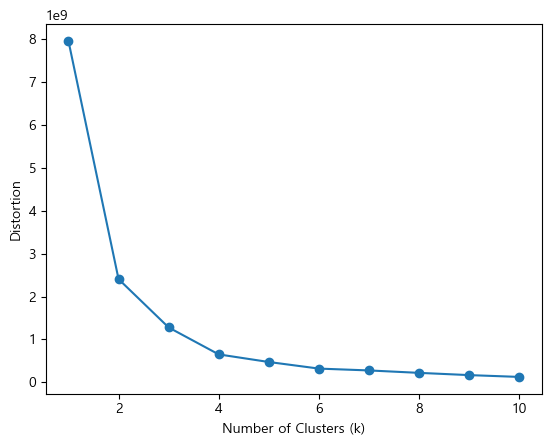

In [7]:
inertia = list()

# k를 1부터 10까지 변화시켜가며 inertia를 측정
for i in range(1,11):
    model = kmeans(i).fit(x)
    inertia.append(model.inertia_)

# k에 따른 inertia의 변화를 확인하여 그래프가 급격히 변하는 지점으로 k값 선정
plt.plot(range(1,11), inertia, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()

# 군집화 수행

In [20]:
# k를 2개로 설정하고 군집 모델 학습
model = kmeans(2).fit(x_train)

# 각각의 클러스터의 중심 확인
centers = model.cluster_centers_
print(centers)

[[6.25000000e-01 2.19642857e+00 3.47142857e+01 2.36607143e+00
  2.68750000e+00 8.50111607e+03 2.20535714e+00 2.46428571e+00
  2.50000000e+00 2.53571429e+00 1.08928571e+00 2.84821429e+00
  3.03571429e+00 3.79375000e+01 1.70535714e+00 2.08035714e+00
  1.46428571e+00 3.27678571e+00 1.20535714e+00 1.69642857e+00
  1.03571429e+00]
 [7.14285714e-01 2.19897959e+00 1.78299320e+01 2.31122449e+00
  3.01360544e+00 2.19387245e+03 1.85544218e+00 2.42176871e+00
  3.09863946e+00 2.33503401e+00 1.09353741e+00 2.85034014e+00
  2.23299320e+00 3.51411565e+01 1.83163265e+00 1.90136054e+00
  1.36394558e+00 2.82312925e+00 1.14965986e+00 1.35544218e+00
  1.04761905e+00]]


In [21]:
# 분류된 군집화 값 확인
model.labels_

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,

In [31]:
# 새로운 데이터프레임에 cluster에 대한 컬럼 추가하고 군집화 값 입력

df_result = pd.DataFrame( {'km_cluster' : model.labels_,
                            'credit.rating' : x_train['credit.rating']} )

df_result

,km_cluster,credit.rating
548,1,1
653,1,1
833,1,0
262,1,1
504,0,1
...,...,...
372,0,1
85,1,1
957,1,0
789,1,0


In [28]:
df_result.groupby( ['km_cluster'] ).count().T

km_cluster,0,1
credit.rating,112,588


In [29]:
conf_mat = pd.crosstab( df_result['credit.rating'], df_result['km_cluster'], rownames=['credit.rating'], colnames=['km_cluster'] )
conf_mat

km_cluster,0,1
credit.rating,,
0,42,168
1,70,420


In [30]:
accuracy_score(df_result['credit.rating'], df_result['km_cluster'])

0.66